In [676]:
import numpy as np
import pandas as pd
import re
from graphviz import Digraph

In [647]:
dot = Digraph(comment = "The Round Table", engine="neato")

In [648]:
dot.node("XXX", "King Arthur", pos='0,0!')

In [649]:
dot.node("123XX", "Sir Bedevere the wise", pos='-3,0!')

In [650]:
dot.node("L", "Sir Lancelot", pos='0,1!')

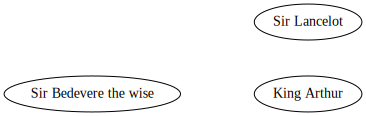

In [651]:
dot

In [652]:
print(dot.source)

// The Round Table
digraph {
	XXX [label="King Arthur" pos="0,0!"]
	"123XX" [label="Sir Bedevere the wise" pos="-3,0!"]
	L [label="Sir Lancelot" pos="0,1!"]
}


In [653]:
# dot.render('sss.gv',view=True)

In [654]:
print(np.sqrt(1/2))
print(2*np.sqrt(1/2))
print(3*np.sqrt(1/2))

0.7071067811865476
1.4142135623730951
2.121320343559643


In [655]:
bb = Digraph(comment = "Baseball", engine="neato")
bb.node("XXX","XXX",pos = '0,0!', shape='rect', style='filled', fillcolor='black', fontcolor='white')
bb.node("0XX","0XX",pos='0,-1!',color='red',style='filled',fillcolor='red')
bb.node("0X","0X",pos='0,-2!',color='red',style='filled',fillcolor='red')
bb.node("0","0",pos='0,-3!',color='red',style='filled',fillcolor='red')
bb.node("1XX","1XX",pos='1,0!',color='yellow',style='filled',fillcolor='yellow')
bb.node("1X","1X",pos='2,0!',color='yellow',style='filled',fillcolor='yellow')
bb.node("1","1",pos='3,0!',color='yellow',style='filled',fillcolor='yellow')
bb.node("12XX","12XX",pos='0.7071,0.7071!',color='yellowgreen',style='filled',fillcolor='yellowgreen')
bb.node("12X","12X",pos='1.4142,1.4142!',color='yellowgreen',style='filled',fillcolor='yellowgreen')
bb.node("12","12",pos='2.1213,2.1213!',color='yellowgreen',style='filled',fillcolor='yellowgreen')
bb.node("2XX","2XX",pos='0,1!',color='green',style='filled',fillcolor='green')
bb.node("2X","2X",pos='0,2!',color='green',style='filled',fillcolor='green')
bb.node("2","2",pos='0,3!',color='green',style='filled',fillcolor='green')
bb.node("23XX","23XX",pos='-0.7071,0.7071!',color='cyan',style='filled',fillcolor='cyan')
bb.node("23X","23X",pos='-1.4142,1.4142!',color='cyan',style='filled',fillcolor='cyan')
bb.node("23","23",pos='-2.1213,2.1213!',color='cyan',style='filled',fillcolor='cyan')
bb.node("3XX","3XX",pos='-1,0!',color='blue',style='filled',fillcolor='blue')
bb.node("3X","3X",pos='-2,0!',color='blue',style='filled',fillcolor='blue')
bb.node("3","3",pos='-3,0!',color='blue',style='filled',fillcolor='blue')
bb.node("123XX","123XX",pos='-0.7071,-0.7071!',color='violetred',style='filled',fillcolor='violetred')
bb.node("123X","123X",pos='-1.4142,-1.4142!',color='violetred',style='filled',fillcolor='violetred')
bb.node("123","123",pos='-2.1213,-2.1213!',color='violetred',style='filled',fillcolor='violetred')
bb.node("13XX","13XX",pos='0.7071,-0.7071!',color='orange',style='filled',fillcolor='orangered')
bb.node("13X","13X",pos='1.4142,-1.4142!',color='orange',style='filled',fillcolor='orangered')
bb.node("13","13",pos='2.1213,-2.1213!',color='orange',style='filled',fillcolor='orangered')


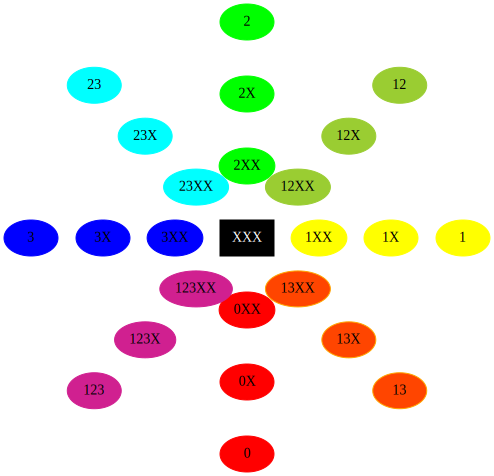

In [656]:
bb

In [657]:
print(bb.source)

// Baseball
digraph {
	XXX [label=XXX fillcolor=black fontcolor=white pos="0,0!" shape=rect style=filled]
	"0XX" [label="0XX" color=red fillcolor=red pos="0,-1!" style=filled]
	"0X" [label="0X" color=red fillcolor=red pos="0,-2!" style=filled]
	0 [label=0 color=red fillcolor=red pos="0,-3!" style=filled]
	"1XX" [label="1XX" color=yellow fillcolor=yellow pos="1,0!" style=filled]
	"1X" [label="1X" color=yellow fillcolor=yellow pos="2,0!" style=filled]
	1 [label=1 color=yellow fillcolor=yellow pos="3,0!" style=filled]
	"12XX" [label="12XX" color=yellowgreen fillcolor=yellowgreen pos="0.7071,0.7071!" style=filled]
	"12X" [label="12X" color=yellowgreen fillcolor=yellowgreen pos="1.4142,1.4142!" style=filled]
	12 [label=12 color=yellowgreen fillcolor=yellowgreen pos="2.1213,2.1213!" style=filled]
	"2XX" [label="2XX" color=green fillcolor=green pos="0,1!" style=filled]
	"2X" [label="2X" color=green fillcolor=green pos="0,2!" style=filled]
	2 [label=2 color=green fillcolor=green pos="0,3!" sty

In [658]:
class BaseballGraph(Digraph):
    def __init__(self, comment='', black_trans=[], red_trans=[], dorings=[True, True, True, True],
                 greyed={}, rmstates={}):
        self.r2 = 1.4
        self.r1 = 2.4
        self.r0 = 3.4
        self.do0 = dorings[0]
        self.do1 = dorings[1]
        self.do2 = dorings[2]
        self.do3 = dorings[3]
        self.black_trans = black_trans
        self.red_trans = red_trans
        self.rmstates = rmstates
        self.states = {'0','0X','0XX',
                      '1','1X','1XX',
                      '2','2X','2XX',
                      '3','3X','3XX',
                      '12','12X','12XX',
                      '13','13X','13XX',
                       '23','23X','23XX',
                       '123','123X','123XX',
                       'XXX'}
        self.greyed = greyed
        self.s2 = 1/np.sqrt(2)
        super(BaseballGraph, self).__init__(comment=comment, engine="neato")
        if self.do3 and "XXX" not in self.rmstates:
            self.node("XXX", "XXX", pos='0,0!', 
                      shape='rect', style='filled', fillcolor='lightgrey' if
                      "XXX" in self.greyed else 'black', fontcolor='black' if
                      "XXX" in self.greyed else 'white')
        if self.do2 and "0XX" not in self.rmstates:
            self.node("0XX", "0XX", pos=f'0,{-self.r2}!',
                      color='magenta', style='filled', fillcolor='lightgrey' if
                      "0XX" in self.greyed else 'magenta')
        if self.do1 and "0X" not in self.rmstates:
            self.node("0X", "0X", pos=f'0,{-self.r1}!',
                      color='magenta', style='filled', fillcolor='lightgrey' if 
                      "0X" in self.greyed else 'magenta')
        if self.do0 and "0" not in self.rmstates:
            self.node("0", "0", pos=f'0,{-self.r0}!',
                      color='magenta', style='filled', fillcolor='lightgrey' if
                      "0" in self.greyed else 'magenta')
        if self.do2 and "1XX" not in self.rmstates:
            self.node("1XX", "1XX", pos=f'{self.r2},0!',
                      color='yellow', style='filled', fillcolor='lightgrey' if
                      "1XX" in self.greyed else 'yellow')
        if self.do1 and "1X" not in self.rmstates:
            self.node("1X", "1X", pos=f'{self.r1},0!',
                      color='yellow', style='filled', fillcolor='lightgrey' if
                      "1X" in self.greyed else 'yellow')
        if self.do0 and "1" not in self.rmstates:
            self.node("1", "1", pos=f'{self.r0},0!',
                      color='yellow', style='filled', fillcolor='lightgrey' if
                      "1" in self.greyed else 'yellow')
        if self.do2 and "12XX" not in self.rmstates:
            self.node("12XX", "12XX", pos=f'{self.r2*self.s2},{self.r2*self.s2}!',
                      color='yellowgreen', style='filled', fillcolor='lightgrey' if
                      "12XX" in self.greyed else 'yellowgreen')
        if self.do1 and "12X" not in self.rmstates:
            self.node("12X", "12X", pos=f'{self.r1*self.s2},{self.r1*self.s2}!',
                      color='yellowgreen', style='filled', fillcolor='lightgrey' if
                      "12X" in self.greyed else 'yellowgreen')
        if self.do0 and "12" not in self.rmstates:
            self.node("12", "12", pos=f'{self.r0*self.s2},{self.r0*self.s2}!',
                      color='yellowgreen', style='filled', fillcolor='lightgrey' if
                      "12" in self.greyed else 'yellowgreen')
        if self.do2 and "2XX" not in self.rmstates:
            self.node("2XX", "2XX", pos=f'0,{self.r2}!',
                      color='green', style='filled', fillcolor='lightgrey' if
                      "2XX" in self.greyed else 'green')
        if self.do1 and "2X" not in self.rmstates:
            self.node("2X", "2X", pos=f'0,{self.r1}!',
                      color='green', style='filled', fillcolor='lightgrey' if
                      "2X" in self.greyed else 'green')
        if self.do0 and "2" not in self.rmstates:
            self.node("2", "2", pos=f'0,{self.r0}!',
                      color='green', style='filled', fillcolor='lightgrey' if
                      "2" in self.greyed else'green')
        if self.do2 and "23XX" not in self.rmstates:
            self.node("23XX", "23XX", pos=f'{-self.r2*self.s2},{self.r2*self.s2}!',
                      color='cyan', style='filled', fillcolor='lightgrey' if
                      "23XX" in self.greyed else 'cyan')
        if self.do1 and "23X" not in self.rmstates:
            self.node("23X", "23X", pos=f'{-self.r1*self.s2},{self.r1*self.s2}!',
                      color='cyan', style='filled', fillcolor='lightgrey' if
                      "23X" in self.greyed else 'cyan')
        if self.do0 and "23" not in self.rmstates:
            self.node("23", "23", pos=f'{-self.r0*self.s2},{self.r0*self.s2}!',
                      color='cyan', style='filled', fillcolor='lightgrey' if
                      "23" in self.greyed else 'cyan')
        if self.do2 and "3XX" not in self.rmstates:
            self.node("3XX", "3XX", pos=f'{-self.r2},0!',
                      color='blue', style='filled', fillcolor='lightgrey' if
                      "3XX" in self.greyed else 'blue')
        if self.do1 and "3X" not in self.rmstates:
            self.node("3X", "3X", pos=f'{-self.r1},0!',
                      color='blue', style='filled', fillcolor='lightgrey' if
                      "3X" in self.greyed else 'blue')
        if self.do0 and "3" not in self.rmstates:
            self.node("3", "3", pos=f'{-self.r0},0!',
                      color='blue', style='filled', fillcolor='lightgrey' if 
                      "3" in self.greyed else 'blue')
        if self.do2 and "123XX" not in self.rmstates:
            self.node("123XX", "123XX", pos=f'{-self.r2*self.s2},{-self.r2*self.s2}!',
                      color='purple', style='filled', fillcolor='lightgrey' if 
                      "123XX" in self.greyed else 'purple')
        if self.do1 and "123X" not in self.rmstates:
            self.node("123X", "123X", pos=f'{-self.r1*self.s2},{-self.r1*self.s2}!',
                      color='purple', style='filled', fillcolor='lightgrey' if
                      "123X" in self.greyed else 'purple')
        if self.do0 and "123" not in self.rmstates:
            self.node("123", "123", pos=f'{-self.r0*self.s2},{-self.r0*self.s2}!',
                      color='purple', style='filled', fillcolor='lightgrey' if
                      "123" in self.greyed else 'purple')
        if self.do2 and "13XX" not in self.rmstates:
            self.node("13XX", "13XX", pos=f'{self.r2*self.s2},{-self.r2*self.s2}!',
                      color='red', style='filled', fillcolor='lightgrey' if 
                      "13XX" in self.greyed else 'red')
        if self.do1 and "13X" not in self.rmstates:
            self.node("13X", "13X", pos=f'{self.r1*self.s2},{-self.r1*self.s2}!',
                      color='red', style='filled', fillcolor='lightgrey' if
                     "13X" in self.greyed else 'red')
        if self.do0 and "13" not in self.rmstates:
            self.node("13", "13", pos=f'{self.r0*self.s2},{-self.r0*self.s2}!',
                      color='red', style='filled', fillcolor='lightgrey' if 
                      "13" in self.greyed else 'red')
        for t in self.black_trans:
            fromto = t.split(':')
            self.edge(fromto[0], fromto[1], color='black', constraint='false')
        for t in self.red_trans:
            fromto = t.split(':')
            self.edge(fromto[0], fromto[1], color='red', constraint='false')

In [659]:
possible_transitions_string = "0:0X,0:1,0:2,0:3,0:0,0X:0XX,0X:1X,0X:2X,0X:3X,0X:0X,0XX:XXX,0XX:1XX,0XX:2XX,0XX:3XX,0XX:0XX,3:0XX,3:3X,3:0X,3:1X,3:13,3:1,3:2X,3:23,3:2,3:3,3:0,3X:XXX,3X:3XX,3X:0XX,3X:1XX,3X:13X,3X:1X,3X:2XX,3X:23X,3X:2X,3X:3X,3X:0X,3XX:XXX,3XX:13XX,3XX:1XX,3XX:23XX,3XX:2XX,3XX:3XX,3XX:0XX,2:0XX,2:2X,2:3X,2:0X,2:1X,2:12,2:13,2:1,2:23,2:2,2:3,2:0,2X:XXX,2X:2XX,2X:3XX,2X:0XX,2X:1XX,2X:12X,2X:13X,2X:1X,2X:23X,2X:2X,2X:3X,2X:0X,2XX:XXX,2XX:12XX,2XX:13XX,2XX:1XX,2XX:23XX,2XX:2XX,2XX:3XX,2XX:0XX,23:XXX,23:3XX,23:0XX,23:2XX,23:23X,23:2X,23:3X,23:0X,23:1XX,23:13X,23:1X,23:12X,23:123,23:12,23:13,23:1,23:23,23:2,23:3,23:0,23X:XXX,23X:23XX,23X:2XX,23X:3XX,23X:0XX,23X:13XX,23X:1XX,23X:12XX,23X:123X,23X:12X,23X:13X,23X:1X,23X:23X,23X:2X,23X:3X,23X:0X,23XX:XXX,23XX:123XX,23XX:12XX,23XX:13XX,23XX:1XX,23XX:23XX,23XX:2XX,23XX:3XX,23XX:0XX,1:0XX,1:1X,1:2X,1:3X,1:0X,1:12,1:13,1:1,1:23,1:2,1:3,1:0,1X:XXX,1X:1XX,1X:2XX,1X:3XX,1X:0XX,1X:12X,1X:13X,1X:1X,1X:23X,1X:2X,1X:3X,1X:0X,1XX:XXX,1XX:12XX,1XX:13XX,1XX:1XX,1XX:23XX,1XX:2XX,1XX:3XX,1XX:0XX,13:XXX,13:3XX,13:0XX,13:1XX,13:13X,13:1X,13:2XX,13:23X,13:2X,13:3X,13:0X,13:12X,13:123,13:12,13:13,13:1,13:23,13:2,13:3,13:0,13X:XXX,13X:13XX,13X:1XX,13X:23XX,13X:2XX,13X:3XX,13X:0XX,13X:12XX,13X:123X,13X:12X,13X:13X,13X:1X,13X:23X,13X:2X,13X:3X,13X:0X,13XX:XXX,13XX:123XX,13XX:12XX,13XX:13XX,13XX:1XX,13XX:23XX,13XX:2XX,13XX:3XX,13XX:0XX,12:XXX,12:2XX,12:3XX,12:0XX,12:1XX,12:12X,12:13X,12:1X,12:23X,12:2X,12:3X,12:0X,12:123,12:12,12:13,12:1,12:23,12:2,12:3,12:0,12X:XXX,12X:12XX,12X:13XX,12X:1XX,12X:23XX,12X:2XX,12X:3XX,12X:0XX,12X:123X,12X:12X,12X:13X,12X:1X,12X:23X,12X:2X,12X:3X,12X:0X,12XX:XXX,12XX:123XX,12XX:12XX,12XX:13XX,12XX:1XX,12XX:23XX,12XX:2XX,12XX:3XX,12XX:0XX,123:XXX,123:23XX,123:2XX,123:3XX,123:0XX,123:13XX,123:1XX,123:12XX,123:123X,123:12X,123:13X,123:1X,123:23X,123:2X,123:3X,123:0X,123:123,123:12,123:13,123:1,123:23,123:2,123:3,123:0,123X:XXX,123X:123XX,123X:12XX,123X:13XX,123X:1XX,123X:23XX,123X:2XX,123X:3XX,123X:0XX,123X:123X,123X:12X,123X:13X,123X:1X,123X:23X,123X:2X,123X:3X,123X:0X,123XX:XXX,123XX:123XX,123XX:12XX,123XX:13XX,123XX:1XX,123XX:23XX,123XX:2XX,123XX:3XX,123XX:0XX"

In [660]:
possible_transitions_list = possible_transitions_string.split(',')

In [661]:
len(possible_transitions_list)

293

In [671]:
from_states = ['0','0X','0XX',
               '1','1X','1XX',
               '2','2X','2XX',
               '3','3X','3XX',
               '12','12X','12XX',
               '13','13X','13XX',
               '23','23X','23XX',
               '123','123X','123XX']
to_states = from_states+['XXX']
conceivable_space = []
for s0 in from_states:
        for s1 in to_states:
            conceivable_space.append(s0+':'+s1)

In [672]:
len(conceivable_space)

600

In [761]:
conceivable = pd.DataFrame()
conceivable['string']=conceivable_space
conceivable['fmXxtoC'] = conceivable['string'].map(lambda t:(re.search('^[0-3]+[X]+:[0-3]+$', t) is not None))
conceivable['fmXXtoX'] = conceivable['string'].map(lambda t:(re.search('^[0-3]+XX:[0-3]+X$', t) is not None))
conceivable['fmC'] = conceivable['string'].map(lambda t:(re.search('^[0-3]+:[0-3X]+', t) is not None))
conceivable['fmX'] = conceivable['string'].map(lambda t:(re.search('^[0-3]+X:[0-3X]+', t) is not None))
conceivable['fmXX'] = conceivable['string'].map(lambda t:(re.search('^[0-3]+XX:[0-3X]+', t) is not None))
conceivable['toC'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:[0-3]+$', t) is not None))
conceivable['toX'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:[0-3]+X$', t) is not None))
conceivable['toXX'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:[0-3]+XX$', t) is not None))
conceivable['toXXX'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:XXX$', t) is not None))
conceivable['fm0'] = conceivable['string'].map(lambda t:(re.search('^0X*:[0-3X]+$', t) is not None))
conceivable['fmR'] = conceivable['string'].map(lambda t:(re.search('^[1-3]X*:[0-3X]+$', t) is not None))
conceivable['fmRR'] = conceivable['string'].map(lambda t:(re.search('^[1-3][1-3]X*:[0-3X]+$', t) is not None))
conceivable['fmRRR'] = conceivable['string'].map(lambda t:(re.search('^123X*:[0-3X]+$', t) is not None))
conceivable['to0'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:0X*$', t) is not None))
conceivable['toR'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:[1-3]X*$', t) is not None))
conceivable['toRR'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:[1-3][1-3]X*$', t) is not None))
conceivable['toRRR'] = conceivable['string'].map(lambda t:(re.search('^[0-3X]+:123X*$', t) is not None))
prune = pd.DataFrame()
prune['string'] = conceivable_space
prune['Out0'] = (
    0*conceivable.fmC 
    + 1*conceivable.fmX 
    + 2*conceivable.fmXX)
prune['Out1'] = (
    0*conceivable.toC 
    + 1*conceivable.toX 
    + 2*conceivable.toXX 
    + 3*conceivable.toXXX)
prune['Runners0'] = (
    0*conceivable.fm0 
    + 1*conceivable.fmR 
    + 2*conceivable.fmRR 
    + 3*conceivable.fmRRR)
prune['Runners1'] = (
    0*conceivable.to0 
    + 1*conceivable.toR 
    + 2*conceivable.toRR 
    + 3*conceivable.toRRR)
prune['OutsStayUp'] = prune.Out1 >= prune.Out0
prune['CanBalance'] = prune.Runners1 - prune.Runners0 + prune.Out1 - prune.Out0 <= 1
prune['RunnersDontRetreat'] = True
prune['RunnersDontRetreat']['3:12'] = False
prune['RunnersDontRetreat']['3X:12X'] = False
prune['RunnersDontRetreat']['3XX:12XX'] = False
prune.head(12)

/home/sean/Code/incoming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sean/Code/incoming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,string,Out0,Out1,Runners0,Runners1,OutsStayUp,CanBalance,RunnersDontRetreat
0,0:0,0,0,0,0,True,True,True
1,0:0X,0,1,0,0,True,True,True
2,0:0XX,0,2,0,0,True,False,True
3,0:1,0,0,0,1,True,True,True
4,0:1X,0,1,0,1,True,False,True
5,0:1XX,0,2,0,1,True,False,True
6,0:2,0,0,0,1,True,True,True
7,0:2X,0,1,0,1,True,False,True
8,0:2XX,0,2,0,1,True,False,True
9,0:3,0,0,0,1,True,True,True


In [762]:
sum(prune.RunnersDontRetreat)

600

In [747]:
sum(prune.OutsStayUp & prune.CanBalance & prune.RunnersDontRetreat)

296

In [729]:
print(sum(conceivable.fmXXtoX & conceivable.fmXxtoC))
print(sum(conceivable.fmXXtoX | conceivable.fmXxtoC))
print(sum(conceivable.fmC | conceivable.fmX | conceivable.fmXX))
print(sum(conceivable.toC | conceivable.toX | conceivable.toXX | conceivable.toXXX))
print(sum(conceivable.fm0 | conceivable.fmR | conceivable.fmRR | conceivable.fmRRR))
print(sum(conceivable.to0 | conceivable.toR | conceivable.toRR | conceivable.toRRR | conceivable.toXXX))


0
192
600
600
600
600


In [686]:
bbg = BaseballGraph("Baseball", black_trans=possible_transitions_list)

In [663]:
bbg.graph_attr['splines']='ortho'

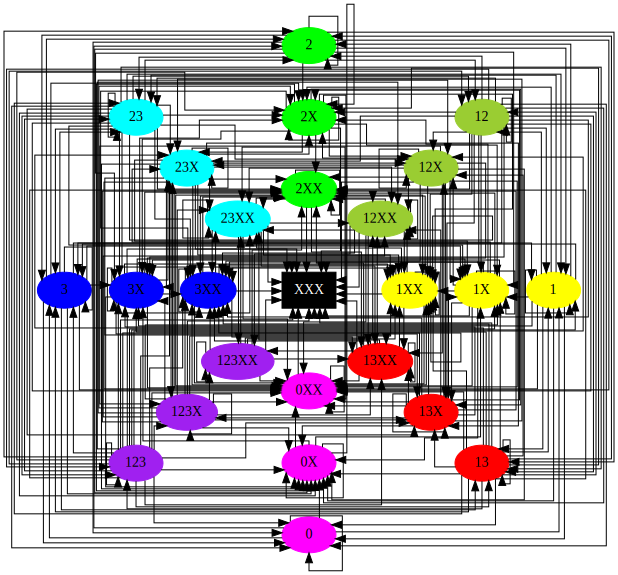

In [664]:
bbg

In [665]:
#bbg.render('baseball_disconnect')

In [358]:
clean_transitions = []
dirty_transitions = []
iX = []
for t in possible_transitions_list:
    if 'X' in t:
        dirty_transitions.append(t)
    else:
        clean_transitions.append(t)
        

In [359]:
len(dirty_transitions) + len(clean_transitions)

293

In [360]:
dirty_transitions[0:5]

['0:0X', '0X:0XX', '0X:1X', '0X:2X', '0X:3X']

In [361]:
clean_transitions[0:5]

['0:1', '0:2', '0:3', '0:0', '3:13']

In [362]:
len(clean_transitions)

56

In [363]:
56*3

168

In [364]:
293-168

125

In [366]:
bbclean = BaseballGraph(comment='Clean', black_trans=clean_transitions, dorings=[True, False, False, False])

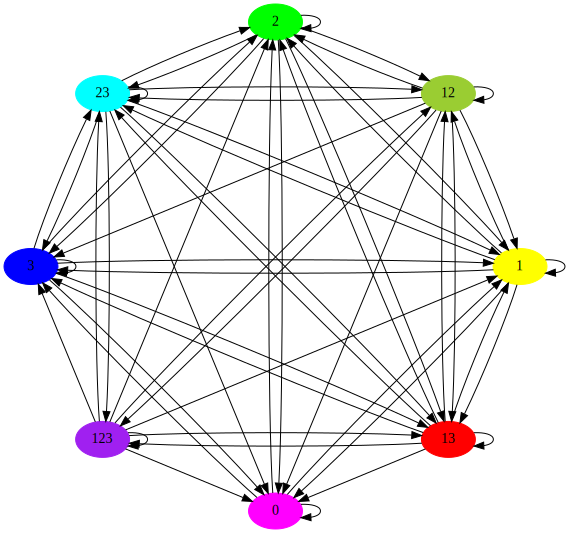

In [367]:
bbclean

In [368]:
clean_space = []
for s0 in ['0','1','2','3','12','23','13','123']:
    for s1 in ['0','1','2','3','12','23','13','123']:
        clean_space.append(s0+':'+s1)

In [369]:
len(clean_space)

64

In [370]:
disallowed_clean = set(clean_space).difference(clean_transitions)

In [371]:
disallowed_clean

{'0:12', '0:123', '0:13', '0:23', '1:123', '2:123', '3:12', '3:123'}

In [465]:
bbdisallowedclean = BaseballGraph(comment='Clean', red_trans=disallowed_clean, dorings=[True, False, False, False])

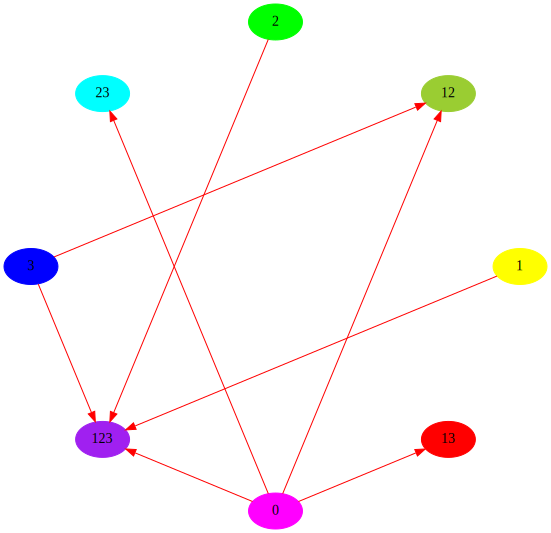

In [374]:
bbdisallowedclean

In [466]:
all_clean = BaseballGraph(comment='Clean', black_trans=clean_transitions, red_trans=disallowed_clean, dorings=[True, False, False, False])

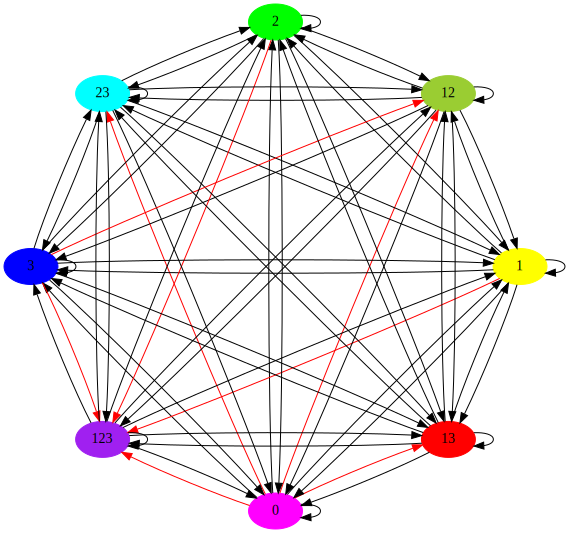

In [467]:
all_clean

In [376]:
re.search('^[0-3]+:[0-3]+X$','12:3X') is not None

True

In [377]:
single_plays = []
non_single_plays = []
for t in possible_transitions_list:
    if re.search('^[0-3]+:[0-3]+X$', t) is not None:
        single_plays.append(t)
    else:
        non_single_plays.append(t)

In [378]:
len(single_plays) + len(non_single_plays)

293

In [379]:
len(single_plays)

42

In [380]:
64-42 # FORBIDDEN

22

In [381]:
single_space = []
for s0 in ['0','1','2','3','12','23','13','123']:
    for s1 in ['0X','1X','2X','3X','12X','23X','13X','123X']:
        single_space.append(s0+':'+s1)

In [382]:
disallowed_single_plays = list(set(single_space).difference(set(single_plays)))

In [383]:
disallowed_single_plays0 = []
disallowed_single_plays1 = []
disallowed_single_plays2 = []
disallowed_single_plays3 = [] # this is empty
for t in disallowed_single_plays:
    if re.search('^0:[0-3]+X$', t) is not None:
        disallowed_single_plays0.append(t)
    elif re.search('^[1-3]:[0-3]+X$', t) is not None:
        disallowed_single_plays1.append(t)
    elif re.search('^[1-3][1-3]:[0-3]+X$', t) is not None:
        disallowed_single_plays2.append(t)

In [384]:
disallowed_single_plays0

['0:123X', '0:12X', '0:3X', '0:2X', '0:1X', '0:23X', '0:13X']

In [385]:
disallowed_single_plays1.sort()

In [386]:
disallowed_single_plays1

['1:123X',
 '1:12X',
 '1:13X',
 '1:23X',
 '2:123X',
 '2:12X',
 '2:13X',
 '2:23X',
 '3:123X',
 '3:12X',
 '3:13X',
 '3:23X']

In [387]:
single_space1 = []
for s0 in ['1','2','3']:
    for s1 in ['0X','1X','2X','3X','12X','23X','13X','123X']:
        single_space1.append(s0+':'+s1)

In [388]:
allowed_single_plays1 = list(set(single_space1).difference(set(disallowed_single_plays1)))

In [389]:
allowed_single_plays1.sort()
allowed_single_plays1

['1:0X',
 '1:1X',
 '1:2X',
 '1:3X',
 '2:0X',
 '2:1X',
 '2:2X',
 '2:3X',
 '3:0X',
 '3:1X',
 '3:2X',
 '3:3X']

In [390]:
disallowed_single_plays2

['12:123X', '13:123X', '23:123X']

In [391]:
len(disallowed_single_plays)

22

In [393]:
bbdisallowedsingle = BaseballGraph(comment='Single', red_trans=disallowed_single_plays,
                                   greyed={'0X','1X','2X','3X','12X','23X','13X','123X'},
                                   dorings=[True, True, False, False])

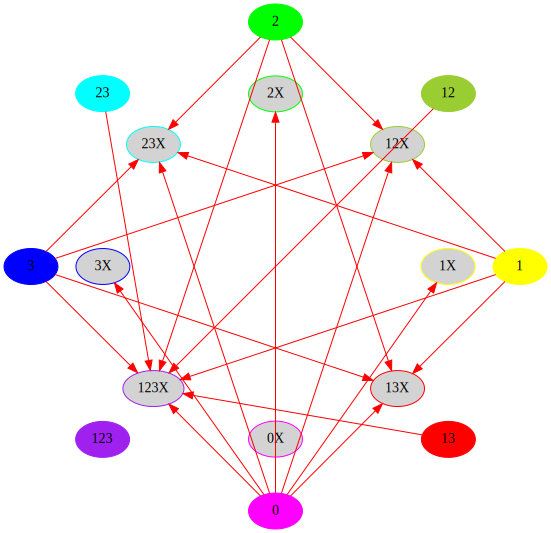

In [394]:
bbdisallowedsingle

In [401]:
singleplays0 = BaseballGraph(comment="Disallowed single plays from 0", 
                             red_trans = disallowed_single_plays0,
                             greyed={'1','2','3','12','23','13','123',
                                     '0X','1X','2X','3X','12X','23X','13X','123X'},
                             rmstates = {'1','2','3','12','23','13','123'},
                             dorings=[True, True, False, False])

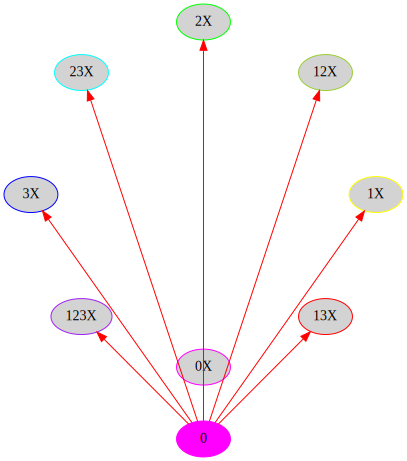

In [402]:
singleplays0

In [403]:
singleplays0allowed = BaseballGraph(comment="Allowed single plays from 0",
                                    black_trans = ['0:0X'],
                                    greyed = {'12','23','13','123',
                                     '0X','1X','2X','3X','12X','23X','13X','123X'},
                                    rmstates={'1','2','3','12','23','13','123'},
                                    dorings=[True, True, False, False])

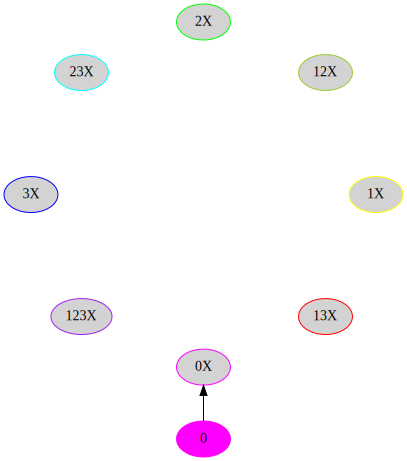

In [404]:
singleplays0allowed

In [481]:
singleplays0graph = BaseballGraph(comment="Single plays from 0",
                                    black_trans = ['0:0X'],
                                    red_trans = disallowed_single_plays0,
                                    greyed = {'12','23','13','123',
                                     '0X','1X','2X','3X','12X','23X','13X','123X'},
                                    rmstates={'1','2','3','12','23','13','123'},
                                    dorings=[True, True, False, False])

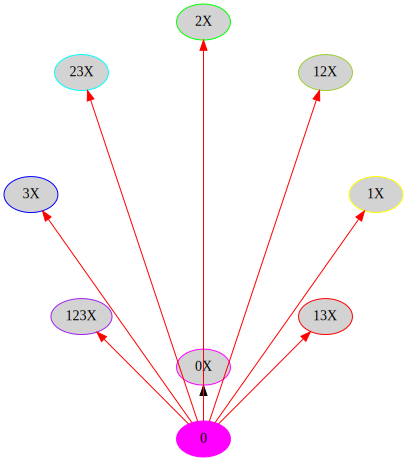

In [482]:
singleplays0graph

In [483]:
singleplays1disallowed = BaseballGraph(comment="Disallowed single plays from 1 on base", 
                             red_trans = disallowed_single_plays1,
                             greyed={'0','12','23','13','123',
                                     '0X','1X','2X','3X','12X','23X','13X','123X'},
                             rmstates={'0','12','23','13','123'},
                             dorings=[True, True, False, False])

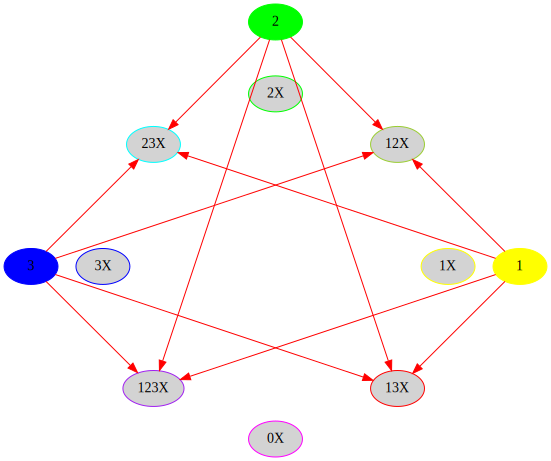

In [484]:
singleplays1disallowed

In [485]:
singleplays1allowed = BaseballGraph(comment="Allowed single plays from 1 on base", 
                             black_trans = allowed_single_plays1,
                             greyed={'0X','1X','2X','3X','12X','23X','13X','123X'},
                             rmstates={'0','12','23','13','123'},
                             dorings=[True, True, False, False])

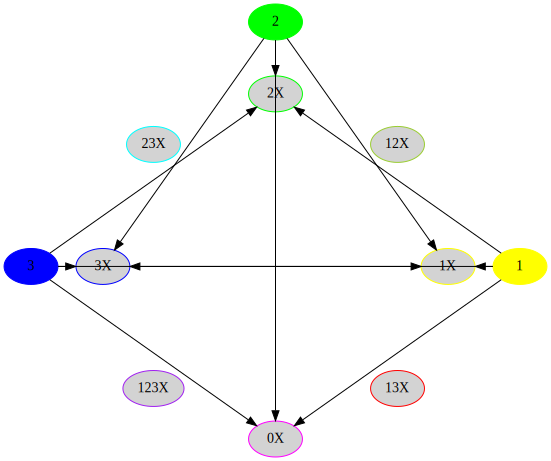

In [486]:
singleplays1allowed

In [625]:
singleplays1graph = BaseballGraph(comment="Single plays from 1 on base",
                             black_trans = allowed_single_plays1,
                             red_trans = disallowed_single_plays1,
                             greyed={'0','12','23','13','123',
                                     '0X','1X','2X','3X','12X','23X','13X','123X'},
                             rmstates={'0','12','23','13','123'},
                             dorings=[True, True, False, False])

In [626]:
singleplays1graph.graph_attr['esep']='+0.05'

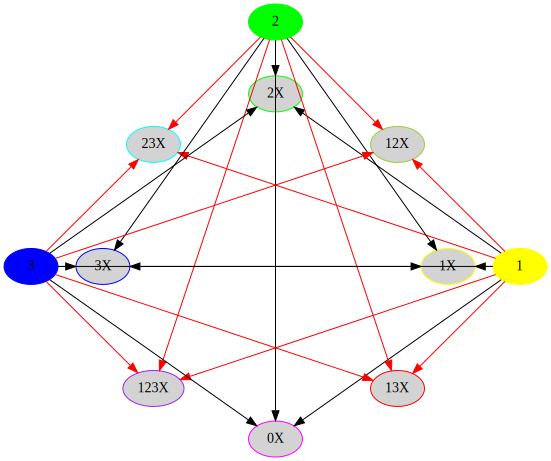

In [627]:
singleplays1graph

In [411]:
disallowed_single_plays2

['12:123X', '13:123X', '23:123X']

In [490]:
single_plays2_space = []
single_space1 = []
for s0 in ['12','23','13']:
    for s1 in ['0X','1X','2X','3X','12X','23X','13X','123X']:
        single_plays2_space.append(s0+':'+s1)


In [493]:
allowed_single_plays2 = list(set(single_plays2_space).difference(set(disallowed_single_plays2)))

In [415]:
singleplays23 = BaseballGraph(comment="Disallowed single plays from 2 or 3 on base", 
                             red_trans = disallowed_single_plays2,
                             greyed={'0X','1X','2X','3X','12X','23X','13X','123X'},
                             rmstates={'0','1','2','3'},
                             dorings=[True, True, False, False])

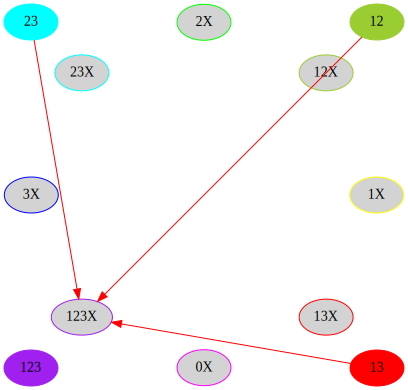

In [480]:
singleplays23

In [496]:
singleplays2graph = BaseballGraph(comment="Single plays from 2 on base",
                             black_trans = allowed_single_plays2,
                             red_trans = disallowed_single_plays2,
                             greyed={'0X','1X','2X','3X','12X','23X','13X','123X'},
                             rmstates={'0','1','2','3','123'},
                             dorings=[True, True, False, False])

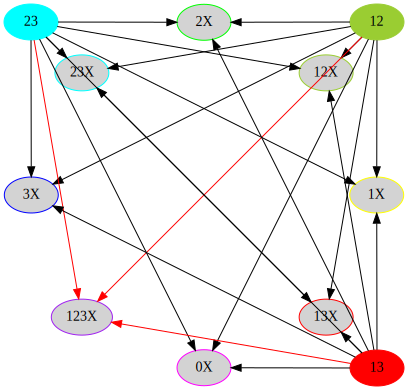

In [497]:
singleplays2graph

In [500]:
singleplays3graph = BaseballGraph(comment="Single plays from 3 on base",
                             black_trans = ['123:0X','123:1X','123:2X','123:3X',
                                            '123:12X','123:13X','123:23X','123:123X'],
                             greyed={'0X','1X','2X','3X','12X','23X','13X','123X'},
                             rmstates={'0','1','2','3','12','13','23'},
                             dorings=[True, True, False, False])

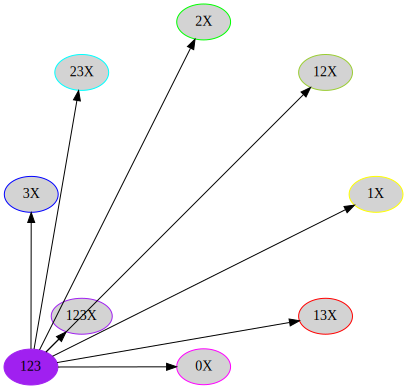

In [501]:
singleplays3graph

In [417]:
single_playsXXX = []
for t in possible_transitions_list:
    if re.search('[0-3]+XX:XXX$', t) is not None:
        single_playsXXX.append(t)

In [418]:
single_playsXXX

['0XX:XXX',
 '3XX:XXX',
 '2XX:XXX',
 '23XX:XXX',
 '1XX:XXX',
 '13XX:XXX',
 '12XX:XXX',
 '123XX:XXX']

In [420]:
singleplaysXXXgraph =  BaseballGraph(comment="Allowed single plays to XXX", 
                             black_trans = single_playsXXX,
                             greyed={'XXX'},
                             rmstates={'0','1','2','3'},
                             dorings=[False, False, True, True])

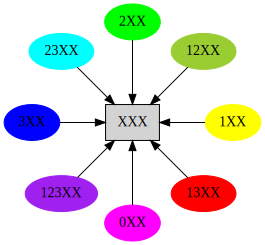

In [421]:
singleplaysXXXgraph

In [521]:
double_plays = []
for t in possible_transitions_list:
    if re.search('[0-3]+:[0-3]+XX$', t) is not None:
        double_plays.append(t)

In [522]:
double_plays

['3:0XX',
 '2:0XX',
 '23:3XX',
 '23:0XX',
 '23:2XX',
 '23:1XX',
 '1:0XX',
 '13:3XX',
 '13:0XX',
 '13:1XX',
 '13:2XX',
 '12:2XX',
 '12:3XX',
 '12:0XX',
 '12:1XX',
 '123:23XX',
 '123:2XX',
 '123:3XX',
 '123:0XX',
 '123:13XX',
 '123:1XX',
 '123:12XX']

In [523]:
double_plays_space = []
for s0 in ['0','1','2','3','12','13','23','123']:
    for s1 in ['0XX','1XX','2XX','3XX','12XX','23XX','13XX','123XX']:
        double_plays_space.append(s0+':'+s1)

In [524]:
len(double_plays_space)

64

In [525]:
double_plays1_space = []
for s0 in ['1','2','3']:
    for s1 in ['0XX','1XX','2XX','3XX','12XX','23XX','13XX','123XX']:
        double_plays1_space.append(s0+':'+s1)

In [526]:
len(double_plays1_space)

24

In [527]:
allowed_double_plays1 = ['1:0XX','2:0XX','3:0XX']

In [528]:
disallowed_double_plays1 = list(set(double_plays1_space).difference(set(allowed_double_plays1)))

In [529]:
len(disallowed_double_plays1)

21

In [530]:
len(double_plays)

22

In [427]:
doubleplaysgraph01 =  BaseballGraph(comment="Allowed double plays from 0 or 1 on base", 
                             black_trans = ['1:0XX','2:0XX','3:0XX'],
                             greyed={'0XX','1XX','2XX','3XX','12XX','13XX','23XX','123XX'},
                             rmstates={'12','13','23','123'},
                             dorings=[True,False,True,False])

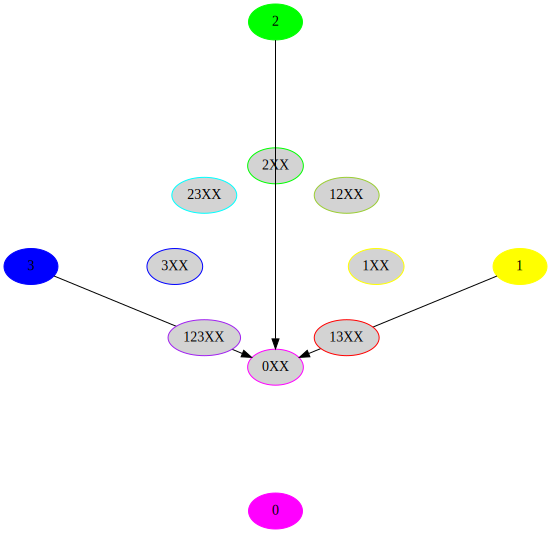

In [428]:
doubleplaysgraph01

In [540]:
doubleplays0graph = BaseballGraph(comment="Double plays from 0 on base",
                                    red_trans = ['0:0XX','0:1XX','0:2XX','0:3XX',
                                                 '0:12XX','0:13XX','0:23XX','0:123XX'],
                                    greyed={'0XX','1XX','2XX','3XX','12XX','13XX','23XX','123XX'},
                                    rmstates={'1','2','3','12','13','23','123'},
                                    dorings=[True,False,True,False])

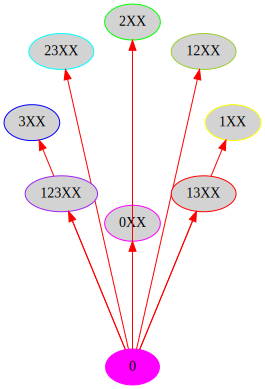

In [541]:
doubleplays0graph

In [535]:
doubleplays1graph =  BaseballGraph(comment="Double plays from 1 on base", 
                             black_trans = allowed_double_plays1,
                             red_trans = disallowed_double_plays1,
                             greyed={'0XX','1XX','2XX','3XX','12XX','13XX','23XX','123XX'},
                             rmstates={'0','12','13','23','123'},
                             dorings=[True,False,True,False])

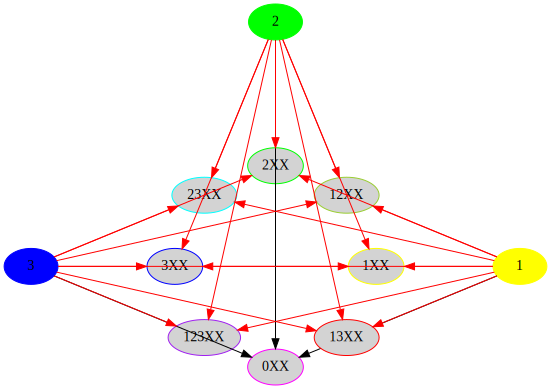

In [536]:
doubleplays1graph

In [565]:
allowed_double_plays2 = []
for t in double_plays:
    if re.search('^[1-3][1-3]:[0-3]+XX$', t) is not None:
        allowed_double_plays2.append(t)

In [566]:
allowed_double_plays23 = []
for t in double_plays:
    if re.search('^[1-3][1-3]+:[0-3]+XX$', t) is not None:
        allowed_double_plays23.append(t)

In [567]:
len(allowed_double_plays23)

19

In [568]:
len(double_plays)

22

In [569]:
4*8-22

10

In [570]:
double_plays2_space = []
for s0 in ['12','13','23']:
    for s1 in ['0XX','1XX','2XX','3XX','12XX','23XX','13XX','123XX']:
        double_plays2_space.append(s0+':'+s1)

In [571]:
len(double_plays2_space)

24

In [572]:
disallowed_double_plays23 = list(set(double_plays23_space).difference(set(allowed_double_plays23)))

In [573]:
disallowed_double_plays2 = list(set(double_plays2_space).difference(set(allowed_double_plays23)))

In [574]:
len(disallowed_double_plays2)

12

In [575]:
len(allowed_double_plays2)

12

In [576]:
len(disallowed_double_plays23)

13

In [577]:
disallowed_double_plays23

['23:13XX',
 '23:12XX',
 '12:13XX',
 '12:12XX',
 '13:123XX',
 '12:123XX',
 '23:23XX',
 '13:23XX',
 '13:12XX',
 '23:123XX',
 '13:13XX',
 '123:123XX',
 '12:23XX']

In [578]:
disallowed_double_plays2

['23:13XX',
 '23:12XX',
 '12:13XX',
 '12:12XX',
 '13:123XX',
 '12:123XX',
 '23:23XX',
 '13:23XX',
 '13:12XX',
 '23:123XX',
 '13:13XX',
 '12:23XX']

In [579]:
doubleplays23graphdisallowed =  BaseballGraph(comment="Disallowed double plays from 2 on base", 
                             red_trans=disallowed_double_plays23,
                             greyed={'0XX','1XX','2XX','3XX','12XX','13XX','23XX','123XX'},
                             rmstates={'0','1','2','3'},
                             dorings=[True,False,True,False])

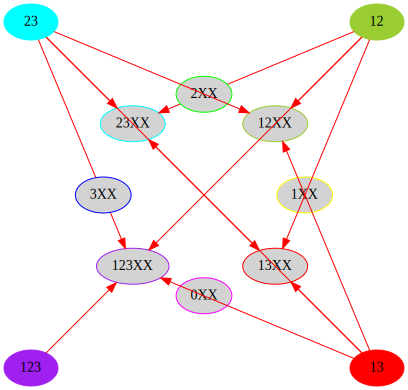

In [580]:
doubleplays23graphdisallowed

In [581]:
doubleplays2graph =  BaseballGraph(comment="Disallowed double plays from 2 on base", 
                             black_trans=allowed_double_plays2,
                             red_trans=disallowed_double_plays2,
                             greyed={'0XX','1XX','2XX','3XX','12XX','13XX','23XX','123XX'},
                             rmstates={'0','1','2','3','123'},
                             dorings=[True,False,True,False])

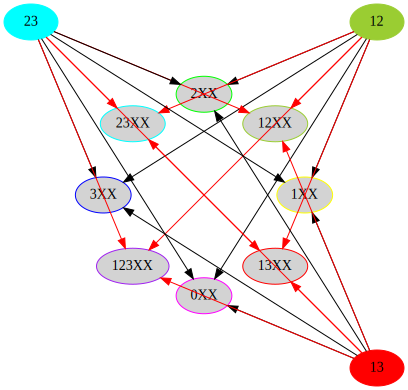

In [582]:
doubleplays2graph

In [588]:
doubleplays3graph =  BaseballGraph(comment="Disallowed double plays from 2 on base", 
                             black_trans=['123:0XX','123:1XX','123:2XX','123:3XX',
                                          '123:12XX','123:13XX','123:23XX'],
                             red_trans=['123:123XX'],
                             greyed={'0XX','1XX','2XX','3XX','12XX','13XX','23XX','123XX'},
                             rmstates={'0','1','2','3','12','13','23'},
                             dorings=[True,False,True,False])

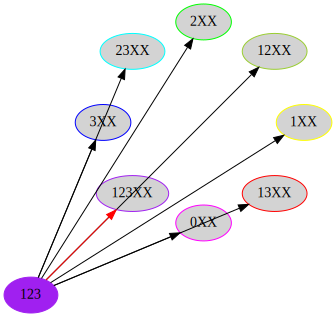

In [589]:
doubleplays3graph

In [446]:
allowed_double_plays_to_XXX = [] # this is empty
for t in possible_transitions_list:
    if re.search('^[0-3]+X:XXX$', t) is not None:
        allowed_double_plays_to_XXX.append(t)

In [447]:
allowed_double_plays_to_XXX

['3X:XXX', '2X:XXX', '23X:XXX', '1X:XXX', '13X:XXX', '12X:XXX', '123X:XXX']

In [448]:
disallowed_double_plays_to_XXX = ['0X:XXX']

In [450]:
doubleplaystoXXXgraphdisallowed =  BaseballGraph(comment="Disallowed double plays to XXX", 
                             red_trans=disallowed_double_plays_to_XXX,
                             greyed={'XXX'},
                             rmstates={},
                             dorings=[False,True,False,True])

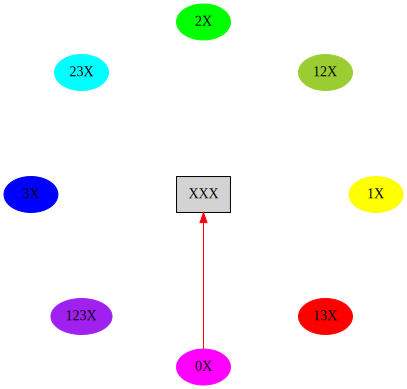

In [451]:
doubleplaystoXXXgraphdisallowed

In [453]:
doubleplaystoXXXgraphallowed =  BaseballGraph(comment="Allowed double plays to XXX", 
                             black_trans=allowed_double_plays_to_XXX,
                             greyed={'XXX'},
                             rmstates={},
                             dorings=[False,True,False,True])

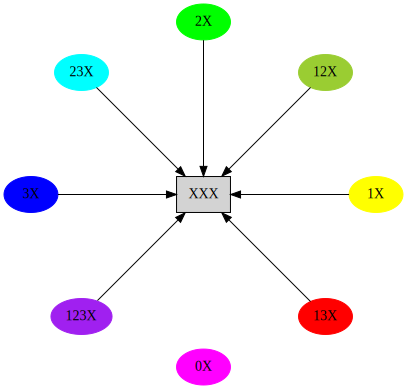

In [454]:
doubleplaystoXXXgraphallowed

In [468]:
doubleplaystoXXXgraph =  BaseballGraph(comment="Double plays to XXX", 
                             black_trans=allowed_double_plays_to_XXX,
                             red_trans=disallowed_double_plays_to_XXX,
                             greyed={'XXX'},
                             rmstates={},
                             dorings=[False,True,False,True])

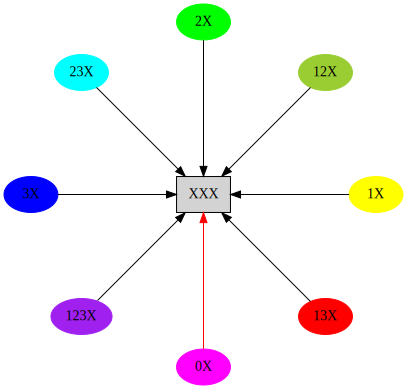

In [469]:
doubleplaystoXXXgraph

In [455]:
allowed_triple_plays = [] # this is empty
for t in possible_transitions_list:
    if re.search('^[0-3]+:XXX$', t) is not None:
        allowed_triple_plays.append(t)

In [456]:
allowed_triple_plays

['23:XXX', '13:XXX', '12:XXX', '123:XXX']

In [458]:
tripleplaysgraphallowed = BaseballGraph(comment="Allowed triple plays", 
                             black_trans=allowed_triple_plays,
                             greyed={'XXX'},
                             rmstates={},
                             dorings=[True,False,False,True])

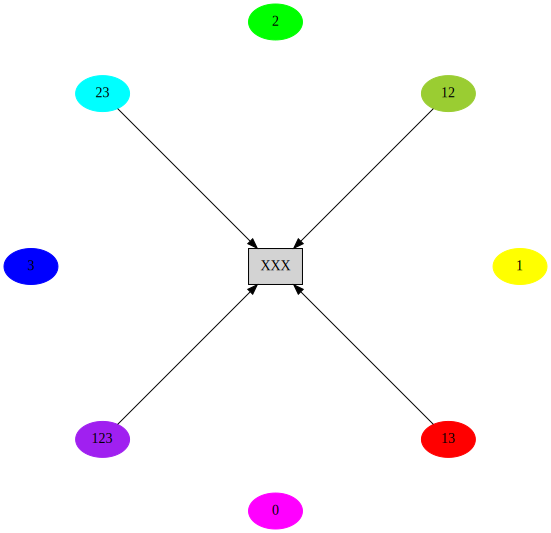

In [459]:
tripleplaysgraphallowed

In [460]:
disallowed_triple_plays = ['0:XXX', '1:XXX', '2:XXX', '3:XXX']

In [462]:
tripleplaysgraphdisallowed = BaseballGraph(comment="Disallowed triple plays", 
                             red_trans=disallowed_triple_plays,
                             greyed={'XXX'},
                             rmstates={},
                             dorings=[True,False,False,True])

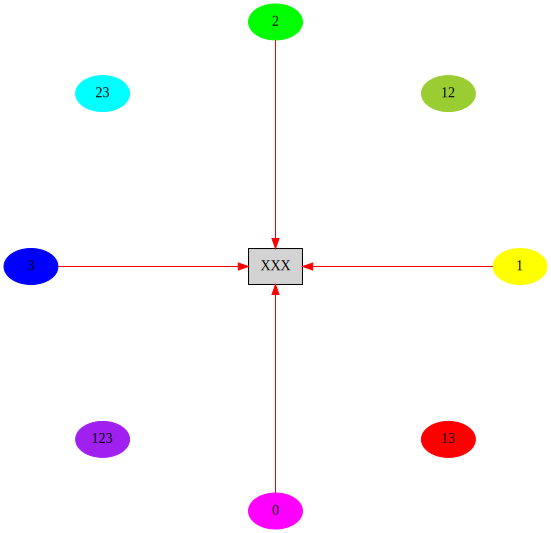

In [463]:
tripleplaysgraphdisallowed

In [470]:
tripleplaysgraph = BaseballGraph(comment="Allowed triple plays",
                             black_trans=allowed_triple_plays,
                             red_trans=disallowed_triple_plays,
                             greyed={'XXX'},
                             rmstates={},
                             dorings=[True,False,False,True])

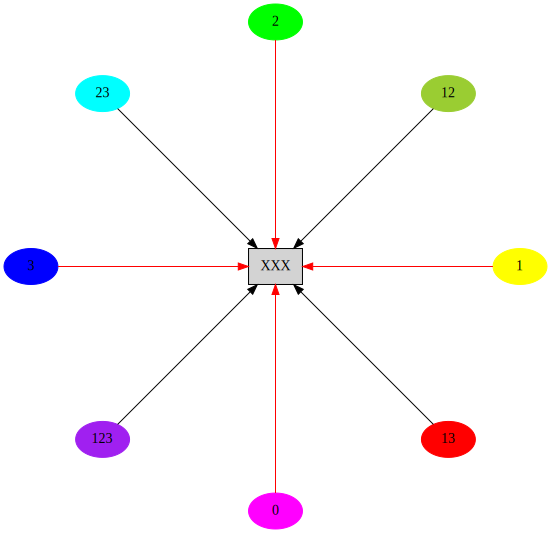

In [471]:
tripleplaysgraph